<a href="https://colab.research.google.com/github/OmkarSolat/Data-Science-Assignments/blob/main/Assignment_6_MLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment - Multiple Linear Regression**
To perform a multiple linear regression analysis to predict the price of Toyota corolla based on the given attributes.

In [ ]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [ ]:
#reading data

df = pd.read_csv('/content/ToyotaCorolla - MLR.csv')
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


# EDA

In [ ]:
#Dependent feature : Price
#Independent feature : Other remaining features

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [ ]:
#describe the dataframe
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


<Figure size 1000x1000 with 0 Axes>

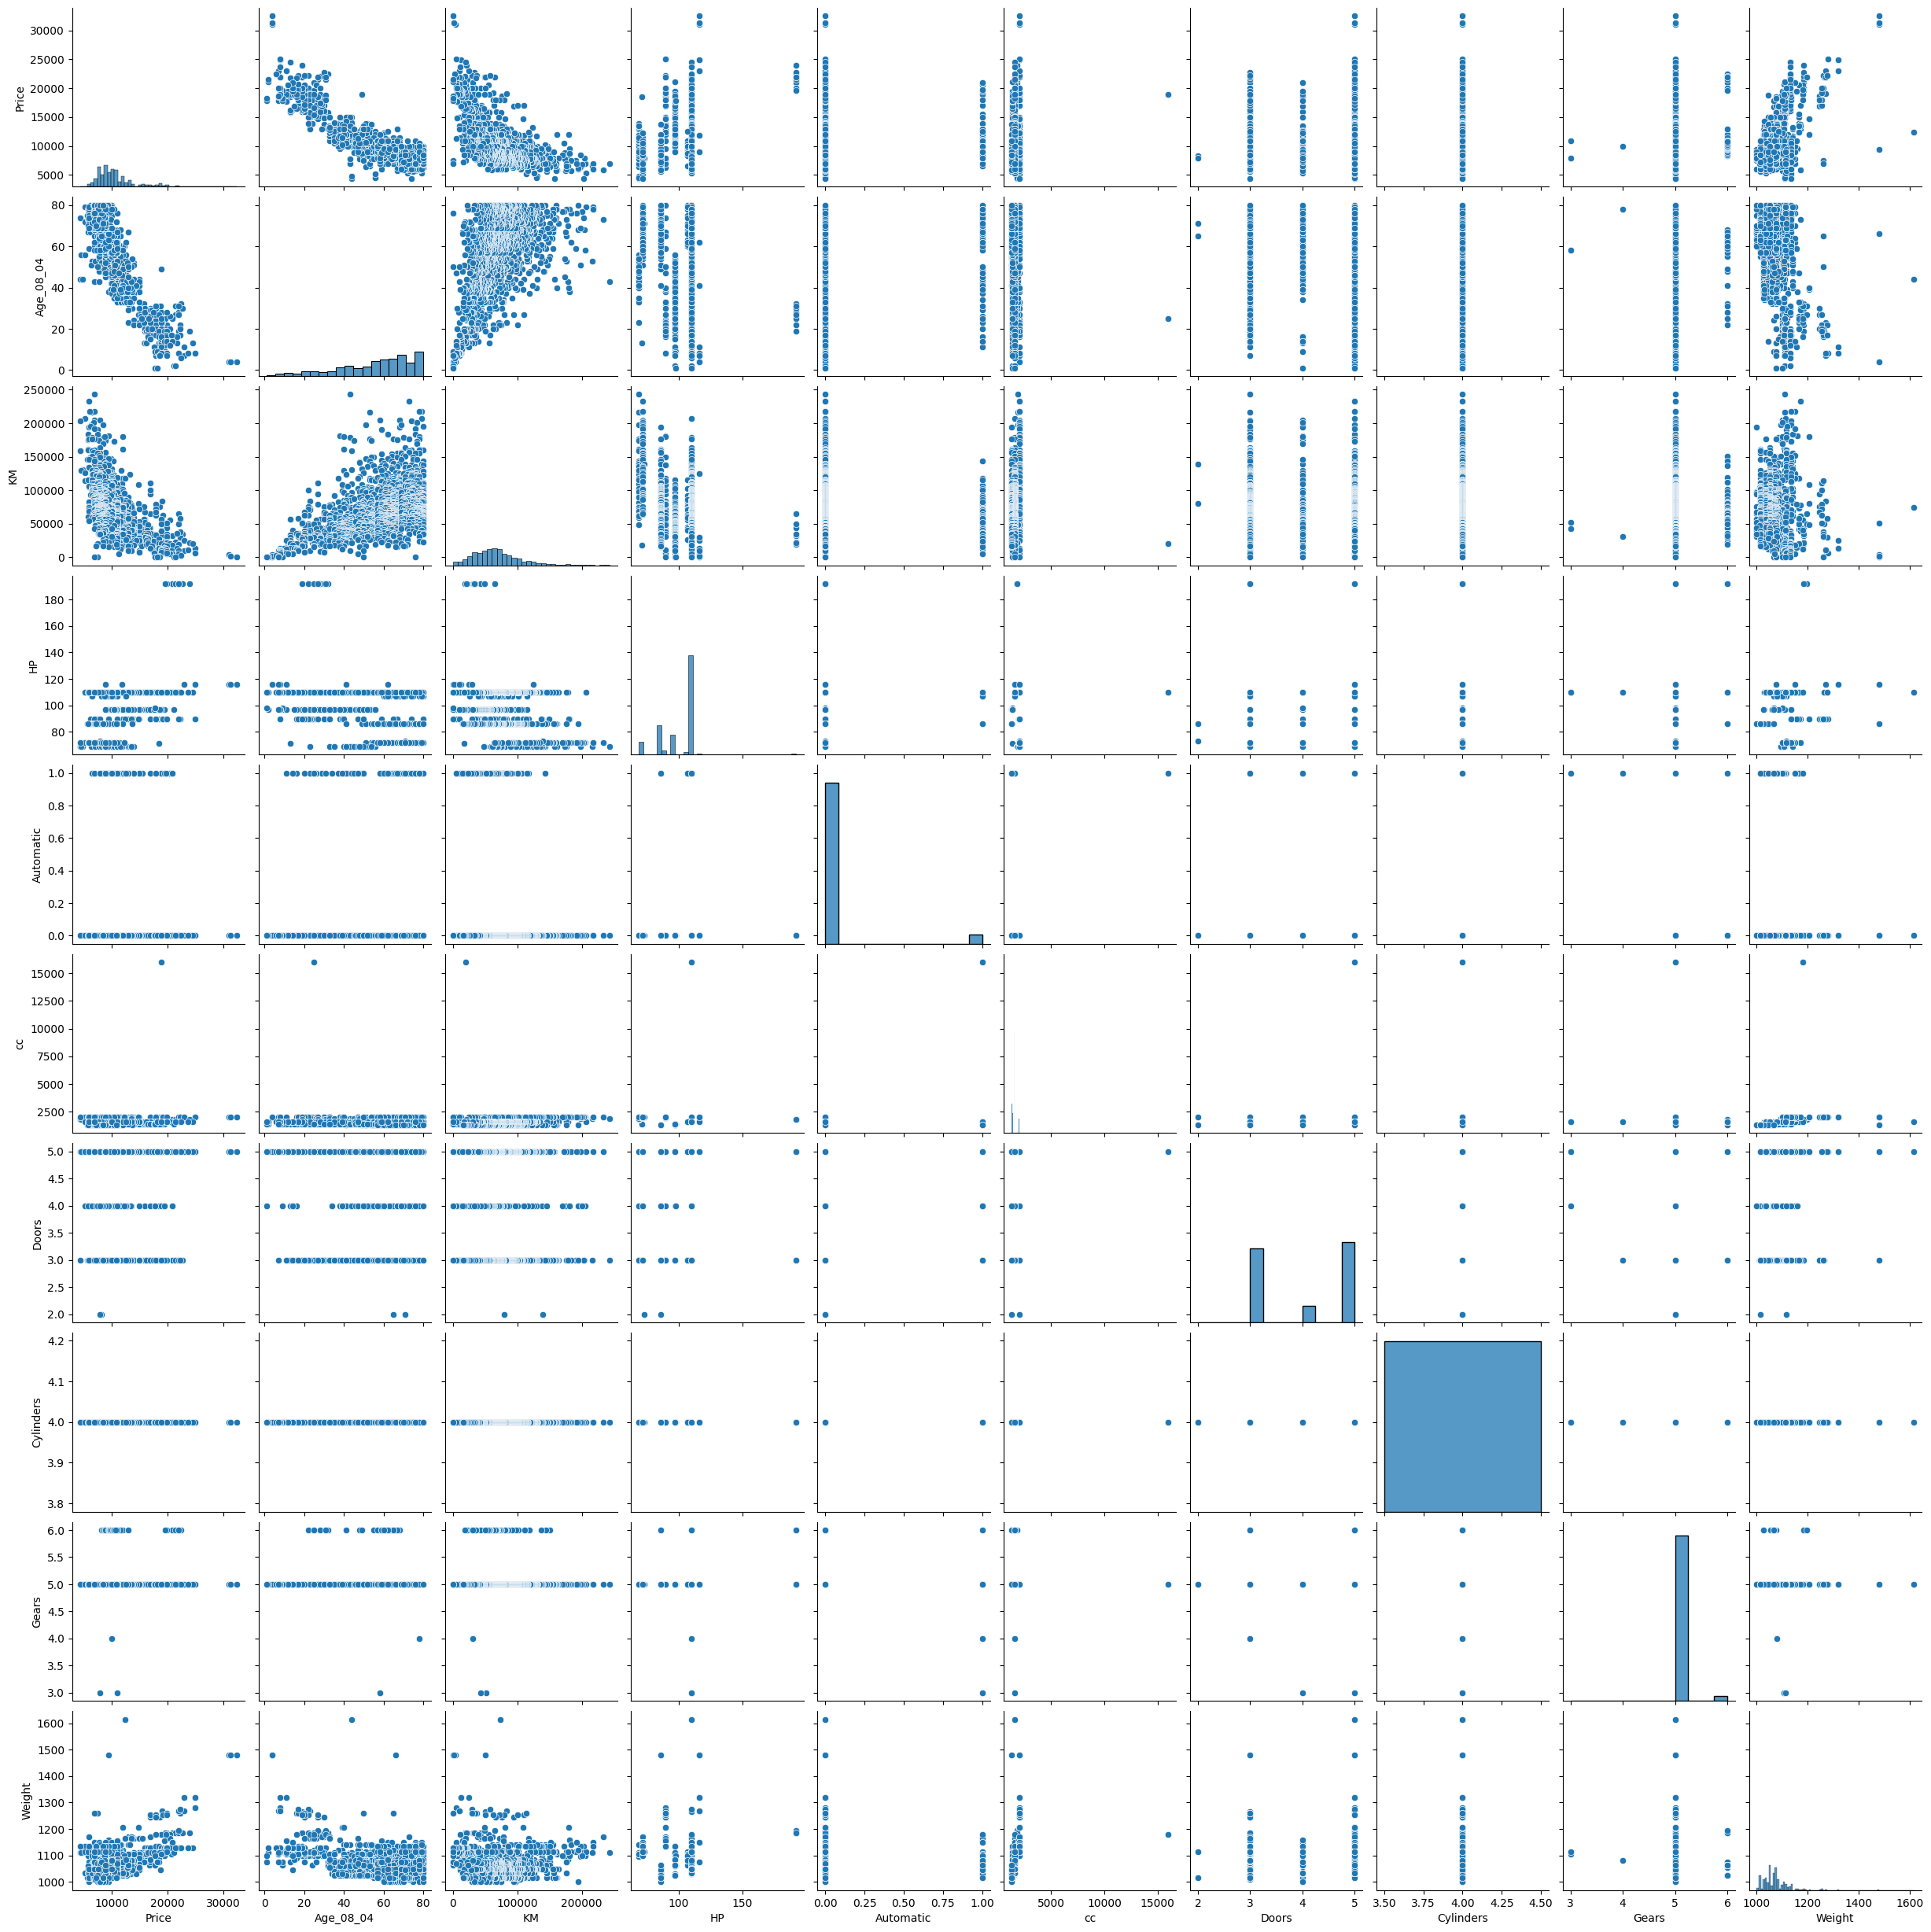

In [ ]:
#pairplot
plt.figure(figsize=(10,10))
sns.pairplot(df)

array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Age_08_04'}>,
        <Axes: title={'center': 'KM'}>],
       [<Axes: title={'center': 'HP'}>,
        <Axes: title={'center': 'Automatic'}>,
        <Axes: title={'center': 'cc'}>],
       [<Axes: title={'center': 'Doors'}>,
        <Axes: title={'center': 'Cylinders'}>,
        <Axes: title={'center': 'Gears'}>],
       [<Axes: title={'center': 'Weight'}>, <Axes: >, <Axes: >]],
      dtype=object)

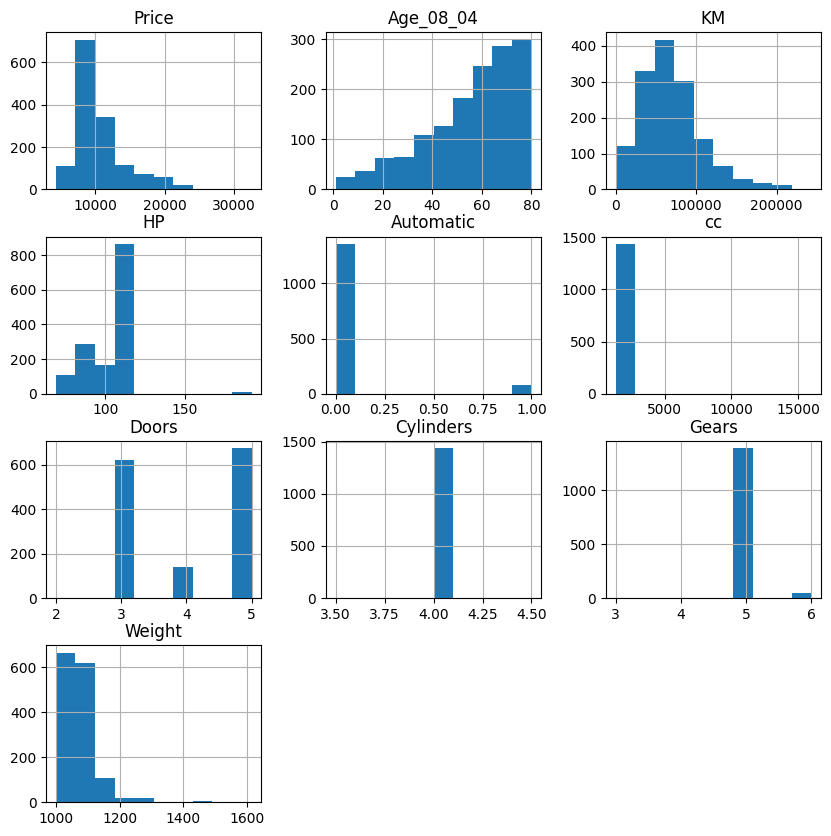

In [ ]:
#distribution of the data
df.hist(figsize=(10,10))

In [ ]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [ ]:
#Renaming the column
df = df.rename(columns={'Age_08_04':'Age'})
df.head()

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [ ]:
df['Cylinders'].unique()

array([4])

In [ ]:
df['Automatic'].unique()

array([0, 1])

In [ ]:
df.drop('Cylinders',axis=1,inplace=True)
df

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,5,1170
...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,5,1015


In [ ]:
#count of missing values
df.isna().sum()

,0
Price,0
Age,0
KM,0
Fuel_Type,0
HP,0
Automatic,0
cc,0
Doors,0
Gears,0
Weight,0


In [ ]:
#label encoding
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
df['Fuel_Type'] = le.fit_transform(df['Fuel_Type'])
df

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,13500,23,46986,1,90,0,2000,3,5,1165
1,13750,23,72937,1,90,0,2000,3,5,1165
2,13950,24,41711,1,90,0,2000,3,5,1165
3,14950,26,48000,1,90,0,2000,3,5,1165
4,13750,30,38500,1,90,0,2000,3,5,1170
...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,2,86,0,1300,3,5,1025
1432,10845,72,19000,2,86,0,1300,3,5,1015
1433,8500,71,17016,2,86,0,1300,3,5,1015
1434,7250,70,16916,2,86,0,1300,3,5,1015


In [ ]:
df.corr()

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
Price,1.000000,-0.876590,-0.569960,-0.022157,0.314990,0.033081,0.126389,0.185326,0.063104,0.581198
Age,-0.876590,1.000000,0.505672,0.080261,-0.156622,0.031717,-0.098084,-0.148359,-0.005364,-0.470253
KM,-0.569960,0.505672,1.000000,-0.420586,-0.333538,-0.081854,0.102683,-0.036197,0.015023,-0.028598
Fuel_Type,-0.022157,0.080261,-0.420586,1.000000,0.409476,0.069718,-0.277239,-0.026935,0.069655,-0.505303
HP,0.314990,-0.156622,-0.333538,0.409476,1.000000,0.013144,0.035856,0.092424,0.209477,0.089614
Automatic,0.033081,0.031717,-0.081854,0.069718,0.013144,1.000000,0.066740,-0.027654,-0.098555,0.057249
cc,0.126389,-0.098084,0.102683,-0.277239,0.035856,0.066740,1.000000,0.079903,0.014629,0.335637
Doors,0.185326,-0.148359,-0.036197,-0.026935,0.092424,-0.027654,0.079903,1.000000,-0.160141,0.302618
Gears,0.063104,-0.005364,0.015023,0.069655,0.209477,-0.098555,0.014629,-0.160141,1.000000,0.020613
Weight,0.581198,-0.470253,-0.028598,-0.505303,0.089614,0.057249,0.335637,0.302618,0.020613,1.000000


<Axes: >

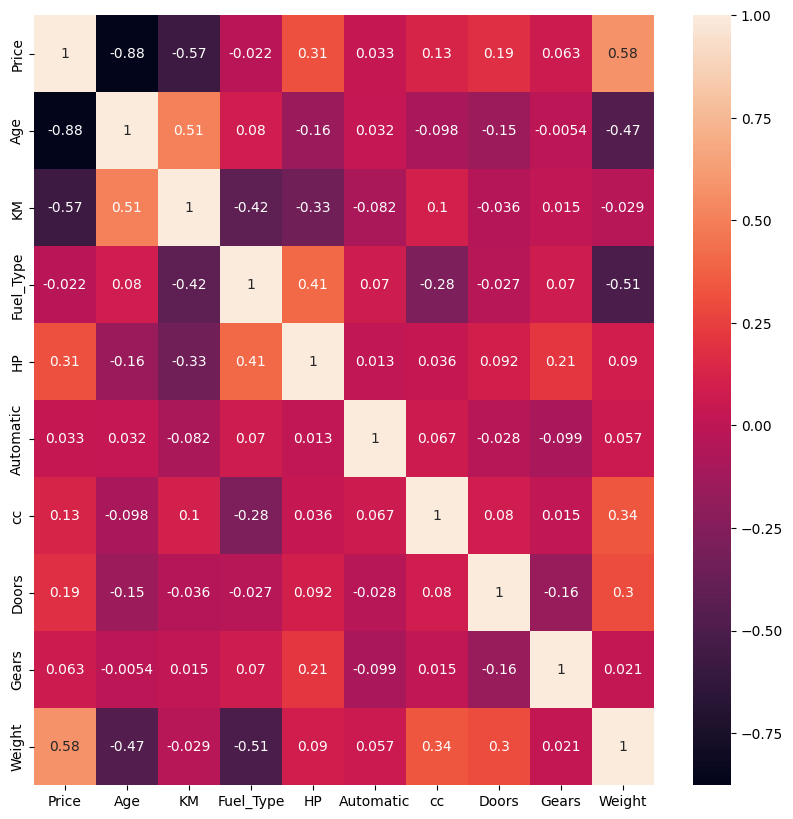

In [ ]:
#heatmap of correlation
figure = plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

<Axes: >

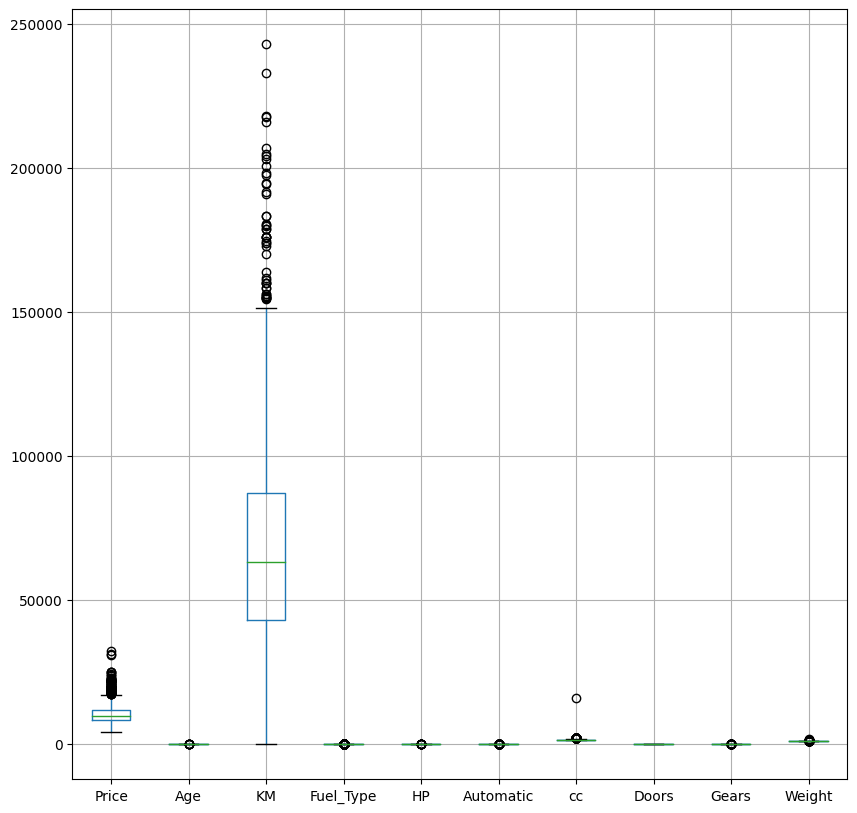

In [ ]:
#boxplot
df.boxplot(figsize=(10,10))

In [ ]:
#outliers handling
#IQR handling for 'KM'

q1 = np.percentile(df['KM'],25)
q3 = np.percentile(df['KM'],75)

iqr = q3-q1

lb = q1-1.5*iqr   #lower bound
ub = q3+1.5*iqr   #upper bound

In [ ]:
df[df['KM']>ub]

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
186,6950,43,243000,1,69,0,1900,3,5,1110
187,9500,38,180638,1,90,0,2000,4,5,1160
188,11950,40,179860,1,90,0,2000,5,5,1205
189,7750,43,178858,0,110,0,1600,3,5,1084
190,11950,40,161000,1,69,0,1900,3,5,1105
191,4350,44,158320,1,69,0,1800,5,5,1110
378,6500,53,216000,1,69,0,1900,3,5,1110
379,6400,51,198167,1,69,0,1900,4,5,1095
380,7000,53,176000,1,69,0,1900,3,5,1105
381,7750,54,174139,1,72,0,2000,4,5,1100


In [ ]:
#capping
df['KM'][df['KM']>ub] = ub
df['KM'][df['KM']<lb] = lb

<ipython-input-22-f86defd936cd>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '153051.875' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df['KM'][df['KM']>ub] = ub


<Axes: ylabel='KM'>

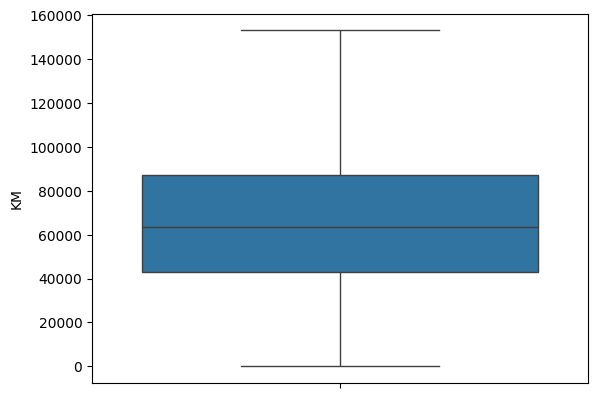

In [ ]:
sns.boxplot(df['KM'])

In [ ]:
df

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,13500,23,46986.0,1,90,0,2000,3,5,1165
1,13750,23,72937.0,1,90,0,2000,3,5,1165
2,13950,24,41711.0,1,90,0,2000,3,5,1165
3,14950,26,48000.0,1,90,0,2000,3,5,1165
4,13750,30,38500.0,1,90,0,2000,3,5,1170
...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544.0,2,86,0,1300,3,5,1025
1432,10845,72,19000.0,2,86,0,1300,3,5,1015
1433,8500,71,17016.0,2,86,0,1300,3,5,1015
1434,7250,70,16916.0,2,86,0,1300,3,5,1015


# Model Building

In [ ]:
#Age + KM + Fuel_Type + HP + Automatic +cc

model_1 = smf.ols('Price ~ Age + KM + Fuel_Type + HP + Automatic +cc',data=df).fit()

In [ ]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     1090.
Date:                Sat, 10 Aug 2024   Prob (F-statistic):               0.00
Time:                        09:08:01   Log-Likelihood:                -12573.
No. Observations:                1436   AIC:                         2.516e+04
Df Residuals:                    1429   BIC:                         2.520e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.693e+04    410.579     41.226      0.000    1.61e+04    1.77e+04
Age         -145.8831      2.817    -51.779      0.000    -151.410    -140.356
KM            -0.0177      0.002    -10.871      0.000      -0.021      -0.015
Fuel_Type   -959.6204    141.681     -6.773      0.000   -1237.545    -681.696
HP            44.2459      3.089     14.323      0.000      38.186      50.306
Automatic    715.4388    179.311      3.990      0.000     363.699    1067.179
cc             0.2700      0.102      2.651      0.008       0.070       0.470
==============================================================================
Omnibus:                      296.363   Durbin-Watson:                   1.357
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1966.954
Skew:                           0.788   Prob(JB):                         0.00
Kurtosis:                       8.513   Cond. No.                     7.78e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.78e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#Age + KM + Fuel_Type + Weight + Gears + cc

model_2 = smf.ols('Price ~ Age + KM + Fuel_Type + Weight + Gears + cc',data=df).fit()

In [ ]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     1425.
Date:                Sat, 10 Aug 2024   Prob (F-statistic):               0.00
Time:                        09:08:01   Log-Likelihood:                -12411.
No. Observations:                1436   AIC:                         2.484e+04
Df Residuals:                    1429   BIC:                         2.487e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.274e+04   1481.684     -8.601      0.000   -1.57e+04   -9838.062
Age         -122.1853      2.722    -44.895      0.000    -127.524    -116.847
KM            -0.0199      0.001    -13.739      0.000      -0.023      -0.017
Fuel_Type   1167.1813    131.965      8.845      0.000     908.316    1426.046
Weight        23.1042      0.950     24.331      0.000      21.241      24.967
Gears        928.8719    194.103      4.785      0.000     548.114    1309.630
cc             0.0183      0.092      0.199      0.842      -0.162       0.198
==============================================================================
Omnibus:                      335.558   Durbin-Watson:                   1.603
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4662.648
Skew:                          -0.684   Prob(JB):                         0.00
Kurtosis:                      11.721   Cond. No.                     3.12e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.12e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#Age + KM + Fuel_Type + Weight + Gears + cc + HP + Doors

model_3 = smf.ols('Price ~ Age + KM + Fuel_Type + Weight + Gears + cc + HP + Doors',data=df).fit()

In [ ]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1129.
Date:                Sat, 10 Aug 2024   Prob (F-statistic):               0.00
Time:                        09:08:01   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.002e+04   1483.549     -6.757      0.000   -1.29e+04   -7113.477
Age         -122.7130      2.659    -46.149      0.000    -127.929    -117.497
KM            -0.0187      0.001    -13.140      0.000      -0.022      -0.016
Fuel_Type    650.8303    145.624      4.469      0.000     365.171     936.490
Weight        21.0086      1.015     20.702      0.000      19.018      22.999
Gears        578.3760    197.264      2.932      0.003     191.417     965.336
cc            -0.0529      0.090     -0.588      0.557      -0.230       0.124
HP            24.1976      2.878      8.408      0.000      18.552      29.843
Doors        -35.0194     40.406     -0.867      0.386    -114.281      44.242
==============================================================================
Omnibus:                      269.515   Durbin-Watson:                   1.602
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2733.587
Skew:                          -0.558   Prob(JB):                         0.00
Kurtosis:                       9.666   Cond. No.                     3.20e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.2e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#R-squared /Accuracy value for model_3 is better than other 2 models,So model_3 is better choice

# Model Validation

Text(0.5, 1.0, 'QQ Plot')

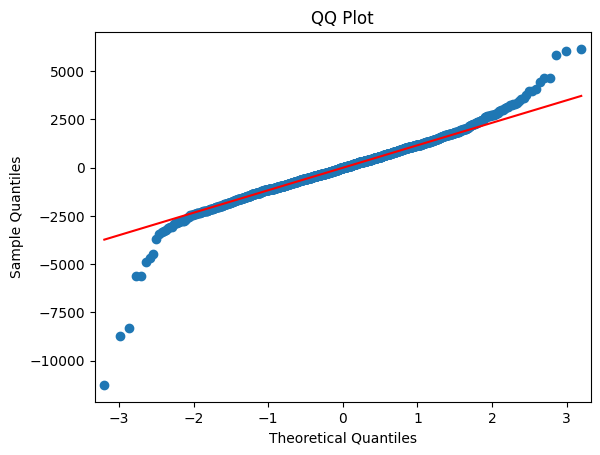

In [ ]:
#QQ PLOT
qqplot = sm.qqplot(model_3.resid,line='q')
plt.title('QQ Plot')

In [ ]:
df

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,13500,23,46986.0,1,90,0,2000,3,5,1165
1,13750,23,72937.0,1,90,0,2000,3,5,1165
2,13950,24,41711.0,1,90,0,2000,3,5,1165
3,14950,26,48000.0,1,90,0,2000,3,5,1165
4,13750,30,38500.0,1,90,0,2000,3,5,1170
...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544.0,2,86,0,1300,3,5,1025
1432,10845,72,19000.0,2,86,0,1300,3,5,1015
1433,8500,71,17016.0,2,86,0,1300,3,5,1015
1434,7250,70,16916.0,2,86,0,1300,3,5,1015


In [ ]:
#Predicting price of Toyota corolla
model_3.predict(df)

,0
0,16258.984356
1,15773.175614
2,16235.020563
3,15871.862990
4,15663.896347
...,...
1431,8759.077582
1432,8209.756127
1433,8369.610085
1434,8494.195125


In [ ]:
#Original values
df['Price']

,Price
0,13500
1,13750
2,13950
3,14950
4,13750
...,...
1431,7500
1432,10845
1433,8500
1434,7250


# Performance Metrics

In [ ]:
from sklearn.model_selection import train_test_split

X = df[['Age', 'KM', 'Fuel_Type', 'Weight', 'Gears', 'cc', 'HP', 'Doors']]

y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Fitting the model on the training set
model_3 = smf.ols('Price ~ Age + KM + Fuel_Type + Weight + Gears + cc + HP + Doors', data=pd.concat([X_train, y_train], axis=1)).fit()

In [ ]:
#Making predictions on the testing set
y_pred = model_3.predict(X_test)

In [ ]:
# Calculating evaluation metrics

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-squared:', r2)

Mean Squared Error: 2088199.082523428
Root Mean Squared Error: 1445.060234911828
R-squared: 0.8434960556608729


# Lasso and Ridge methods on the model

In [ ]:
from sklearn.linear_model import Lasso, Ridge

In [ ]:
# Lasso Regression
lasso_model = Lasso(alpha=0.1)     #alpha (regularization strength)
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.1)

In [ ]:
# Ridge Regression
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

Ridge(alpha=0.1)

In [ ]:
# Making predictions on the testing set
y_pred_lasso = lasso_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)

In [ ]:
y_pred_lasso

array([11212.00737163,  8981.79703633,  9264.28820198,  8974.87749496,
       10120.15203156,  7921.14227587,  8718.83818715,  8308.68714342,
       14111.45848923, 13159.52586359,  9503.06571789,  9365.07230114,
       12973.46869728, 12997.30525877,  9797.45057517,  8268.32611186,
       12238.50936117, 17448.60216356,  7413.85873638,  9188.14389474,
       12729.92274348, 17844.94474669,  7923.4444725 , 10435.52562358,
        7480.4605636 , 16062.96016614,  9748.64162124,  7363.23104202,
       15683.51100368, 14524.3066948 ,  8174.61552879,  9743.74023972,
        8536.77843456, 10132.22019814, 10293.09415238,  8075.27423898,
        8831.84629875,  9998.32974687, 16387.15166942,  9584.25097535,
        9883.89268915,  9549.41272007,  7901.97666477,  5528.31466917,
        6811.41419125, 17211.1583804 ,  9469.84127737, 10718.29161483,
        8730.10834941, 13508.45993464, 13025.43889887,  6346.55550107,
       14946.40184401, 16342.55859062,  6060.01804484,  7775.37998091,
      

In [ ]:
y_pred_ridge

array([11212.0140058 ,  8981.78814105,  9264.30959217,  8974.75041557,
       10120.02777637,  7921.04107894,  8718.73873314,  8308.6574314 ,
       14111.34546018, 13159.40913957,  9502.97691926,  9365.05422213,
       12973.34954126, 12997.31920692,  9797.44551205,  8268.39250925,
       12238.52812303, 17448.62835812,  7413.86048387,  9188.01170523,
       12729.89019406, 17844.92636673,  7923.42754205, 10435.53750536,
        7480.43437941, 16062.89557145,  9748.65586092,  7363.23066316,
       15683.51884625, 14524.18377342,  8174.59904766,  9743.55652479,
        8536.64849473, 10132.20356285, 10293.07366236,  8075.26368887,
        8831.74058624,  9998.3129803 , 16387.16268866,  9584.14957935,
        9883.86864626,  9549.39001281,  7901.84857771,  5528.41332592,
        6811.48210342, 17211.12701742,  9469.82381618, 10718.17640369,
        8730.17036086, 13508.3381892 , 13025.41993898,  6346.61785453,
       14946.42066968, 16342.63320693,  6060.1073008 ,  7775.25826672,
      

In [ ]:
# Calculating evaluation metrics for Lasso
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print('Lasso - Mean Squared Error:', mse_lasso)
print('Lasso - Root Mean Squared Error:', rmse_lasso)
print('Lasso - R-squared:', r2_lasso)

Lasso - Mean Squared Error: 2087998.6553849736
Lasso - Root Mean Squared Error: 1444.9908841875001
Lasso - R-squared: 0.843511077043644


In [ ]:
# Calculating evaluation metrics for Ridge
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print('Ridge - Mean Squared Error:', mse_ridge)
print('Ridge - Root Mean Squared Error:', rmse_ridge)
print('Ridge - R-squared:', r2_ridge)

Ridge - Mean Squared Error: 2088004.5318977046
Ridge - Root Mean Squared Error: 1444.992917594306
Ridge - R-squared: 0.8435106366175231


# Interview Questions

In [ ]:
#1.What is Normalization & Standardization and how is it helpful?

* Normalization :-

Defination - Scales numerical features to a range between 0 and 1.

Usefulness - Helpful for algorithms sensitive to feature scaling like k-Nearest Neighbors or neural networks.

* Standardization:-

Defination - Transforms data to have a mean of 0 and a standard deviation of 1.

Usefulness - Benefits algorithms that assume data is normally distributed like linear regression or support vector machines.


* Conclusion -

Improve Model Convergence: Scaling features can speed up the training process.

Fair Comparison: Allows fair comparison of features with different scales, preventing features with larger ranges from dominating the model.


In [ ]:
#2.What techniques can be used to address multicollinearity in multiple linear regression?

* Variance Inflation Factor (VIF):

Calculate the VIF for each predictor variable. VIF quantifies how much the variance of a regression coefficient is inflated due to multicollinearity.

Remove the variable with the highest VIF if it's above a certain threshold (commonly 5 or 10).

Recalculate VIFs for the remaining variables and repeat the process until all VIFs are below the threshold.

* Subset selection -

Based on R-squared & Based on AIC score

we can use the AIC in order to compare models: the one with the loweer AIC is the best model.

Higher the accuracy score (R2)  better is the model.